In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
# from SupervisedLearning.DecisionTrees.DecisionTreeClassifier import DecisionTreeClassifier
from RandomForestClassifier import RandomForestClassifier



In [3]:
# Load the datasets
iris_data = load_iris()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()

datasets = [
    ("Iris", iris_data.data, iris_data.target),
    ("Wine", wine_data.data, wine_data.target),
    ("Breast Cancer", breast_cancer_data.data, breast_cancer_data.target)
]

# Initialize models
models = {
    'Custom Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Scikit-Learn Random Forest': SklearnRandomForestClassifier(n_estimators=100, random_state=42)
}

In [4]:
# Train and test models on each dataset
results = {}
for name, model in models.items():
    results[name] = []
    for dataset_name, X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name].append(accuracy)

# Display the results
for dataset_name, dataset_results in results.items():
    print(f"Dataset: {dataset_name}")
    for model_name, accuracy in zip(models.keys(), dataset_results):
        print(f"{model_name} Accuracy: {accuracy}")
    print()


Dataset: Custom Random Forest
Custom Random Forest Accuracy: 1.0
Scikit-Learn Random Forest Accuracy: 0.9814814814814815

Dataset: Scikit-Learn Random Forest
Custom Random Forest Accuracy: 1.0
Scikit-Learn Random Forest Accuracy: 1.0



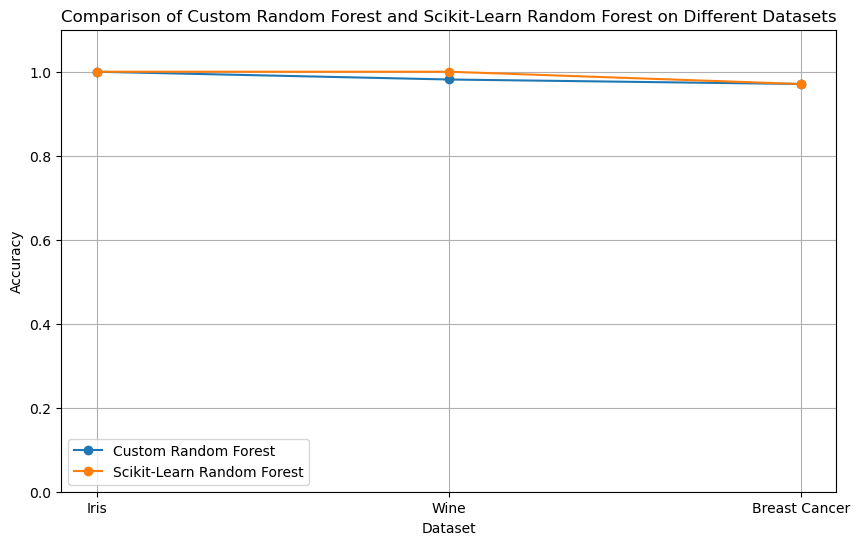

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))
for name, accuracies in results.items():
    plt.plot(range(1, len(datasets)+1), accuracies, label=name, marker='o')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Random Forest and Scikit-Learn Random Forest on Different Datasets')
plt.xticks(range(1, len(datasets)+1), [name for name, _, _ in datasets])
plt.ylim(0.0, 1.1)
plt.legend()
plt.grid(True)
plt.show()